<a href="https://colab.research.google.com/github/mweruwambui/FindIt-App/blob/main/WEATHER_VISUALIZATION_OVER_KENYA_%2CMONTH_1_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# xarray is used to deal with netCDF data
!pip install xarray
# cartopy is used to plot spatial (map) data
!pip install cartopy
# installing wrf-python
!pip install wrf-python
# install the numpy module
!pip install numpy
#install matplot
!pip install matplotlib
# tephi is used to plot tephigrams
!pip install tephi
#install geopandas
!pip install geopandas
!pip install netCDF4


  Using cached wrf-python-1.3.4.1.tar.gz (1.1 MB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.3 MB/s eta 0:00:00


In [22]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.feature as feature
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import shapefile
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.contour as cc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4 # Import the netCDF4 library

#from wrf import getvar, to_np, latlon_coords

In [25]:
#load WRF output data
data = xr.open_dataset('/content/drive/MyDrive/wrfout_d01_2024-05-20_06 00 00')
print(data)

ValueError: did not find a match in any of xarray's currently installed IO backends ['h5netcdf', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [ ]:
print(data.variables)

Frozen({'Times': <xarray.Variable (Time: 17)>
[17 values with dtype=|S19], 'XLAT': <xarray.Variable (Time: 17, south_north: 116, west_east: 99)>
[195228 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:      , 'XLONG': <xarray.Variable (Time: 17, south_north: 116, west_east: 99)>
[195228 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LONGITUDE, WEST IS NEGATIVE
    units:        degree_east
    stagger:      , 'LU_INDEX': <xarray.Variable (Time: 17, south_north: 116, west_east: 99)>
[195228 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LAND USE CATEGORY
    units:        
    stagger:      , 'ZNU': <xarray.Variable (Time: 17, bottom_top: 41)>
[697 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  Z  
    description:  eta values 

In [ ]:
# Extract T2 variable
t2 = data['T2']
#Converting tenperature T2 from kelvin to degrees celsius
t3 = t2-273
#extract latitude and longitude
lon = data['XLONG']
lat = data['XLAT']
# Extract T2 variable and assign latitude and longitude coordinates
t3= data['T2'].assign_coords(lon=data['XLONG'], lat=data['XLAT'])
# Convert temperature from Kelvin to Celsius
t4 = t3-273    # Accurate conversion from Kelvin to Celsius
# Average the temperature over the first nine time steps
t3_0 = t4.isel(Time=slice(0, 9)).mean(dim='Time')

NameError: name 'data' is not defined

In [ ]:
#get all the time indices from the data dataset
time_indices = data.Time.values
#create a list  of all the time indices
ALL_TIMES = list(time_indices)
print(time_indices)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


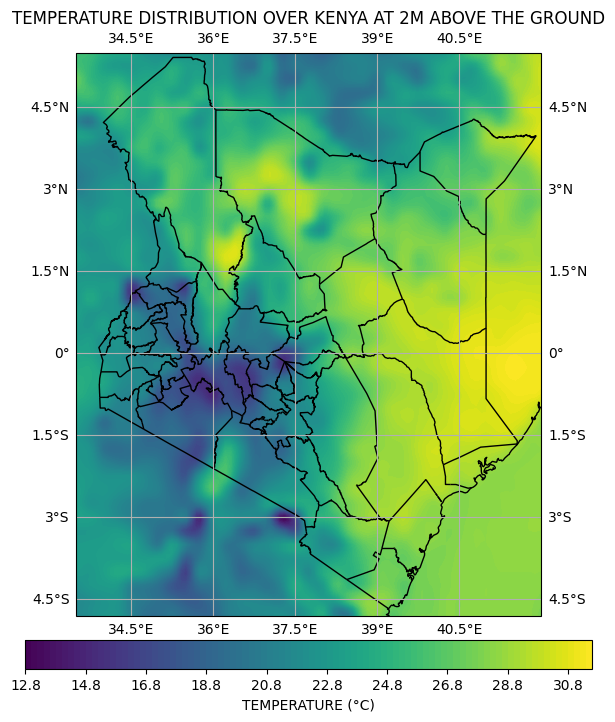

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import xarray as xr

# Create a figure
fig = plt.figure(figsize=(10, 8))

# Define the map projection
ax = plt.axes(projection=ccrs.PlateCarree())
#t4 = t3 - 273  # Convert temperature from Kelvin to Celsius


# Average the temperature over the first nine time steps
#t3_0 = t4.isel(Time=slice(0, 9)).mean(dim='Time')

# Select the first time step if there's more than one
t3_0 = t4.isel(Time=0)

# Filled contour plot
contourf = ax.contourf(t3_0.lon, t3_0.lat, t3_0, transform=ccrs.PlateCarree(), cmap='viridis', levels=100)

# Add color bar
cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)
cbar.set_label('TEMPERATURE (°C)')

# Add Kenya shapefile
shapefile_path = '/content/drive/MyDrive/Kenya_Counties_KNSDI_line.shp'
kenya = gpd.read_file(shapefile_path)
kenya.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

# Add gridlines and coastlines
ax.gridlines(draw_labels=True)
ax.coastlines()
#ax.add_feature(cfeature.BORDERS)

# Set extent to focus on Kenya
ax.set_extent([33.5, 42.0, -4.8, 5.5], crs=ccrs.PlateCarree())

# Add title
plt.title('TEMPERATURE DISTRIBUTION OVER KENYA AT 2M ABOVE THE GROUND')

# Show the plot
plt.show()

In [ ]:
# Extract the necessary variables
qvapor = data['QVAPOR'] # Water vapor mixing ratio (kg/kg)
t = data['T'] # Perturbation potential temperature (K)
p = data['P'] # Perturbation pressure (Pa)
pb = data['PB'] # Base-state pressure (Pa)

In [ ]:
# Define constants for RH calculation
epsilon = 0.622
Rd = 287.05  # Gas constant for dry air [J/(Kg*K)]
Rv = 461.5  # Gas constant for water [J/(Kg*K)]

# Calculate the total pressure
pressure = p + pb  # Total pressure (Pa)

# Calculate the temperature in Kelvin
temp_k = t + 300  # WRF temperature is perturbation from 300K

# Calculate the saturation vapor pressure (using Tetens formula)
es = 6.112 * np.exp((17.67 * (temp_k - 273.15)) / (temp_k - 273.15 + 243.5))  # Saturation vapor pressure (hPa)

# Calculate actual vapor pressure (e)
e = (qvapor * pressure) / (epsilon + qvapor) / 100  # Actual vapor pressure (hPa)

# Calculate Relative Humidity (RH)
rh = (e / es) * 100  # Relative humidity (%)

# Average the relative humidity over the first nine time steps
rh_avg = rh.isel(Time=slice(0, 9)).mean(dim='Time')


In [ ]:
#extract latitude and longitude from the dataset
lon = data['XLONG'].isel(Time=0)
lat = data['XLAT'].isel(Time=0)

TypeError: Input z must be 2D, not 3D

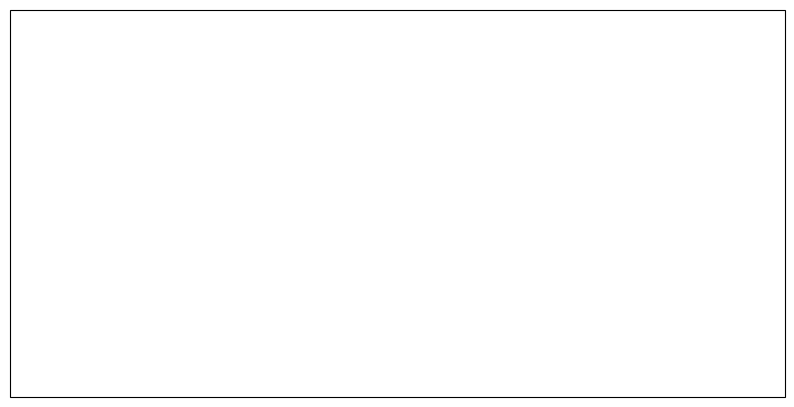

In [ ]:
# Create a figure
fig = plt.figure(figsize=(10, 8))

# Define the map projection
ax = plt.axes(projection=ccrs.PlateCarree())
# Select the first time step of rh_avg for plotting
#rh_avg_0 = rh_avg.isel(Time=0)  # Select the first time step

# Filled contour plot for relative humidity
contourf = ax.contourf(lon, lat, rh_avg, transform=ccrs.PlateCarree(), cmap='viridis', levels=700)
# Add color bar
cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)
cbar.set_label('RELATIVE HUMIDITY (%)')

# Add Kenya shapefile
shapefile_path = '/content/drive/MyDrive/Kenya_Counties_KNSDI_line.shp'
kenya = gpd.read_file(shapefile_path)
kenya.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

# Add gridlines and coastlines
ax.gridlines(draw_labels=True)
ax.coastlines()
# ax.add_feature(cfeature.BORDERS)

# Set extent to focus on Kenya
ax.set_extent([33.5, 42.0, -4.8, 5.5], crs=ccrs.PlateCarree())

# Add title
plt.title('AVERAGE RELATIVE HUMIDITY OVER KENYA AT 2M ABOVE THE GROUND')

# Show the plot
plt.show()

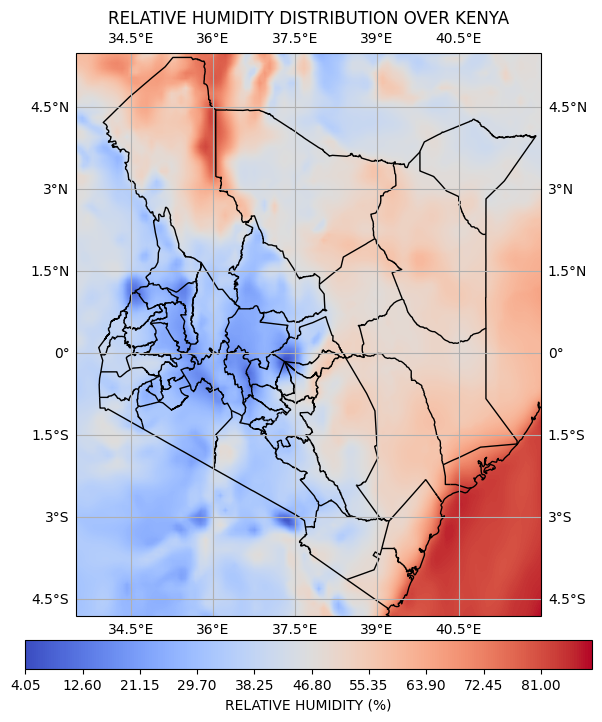

In [ ]:
# Create a figure
fig = plt.figure(figsize=(10, 8))

# Define the map projection
ax = plt.axes(projection=ccrs.PlateCarree())
# Extract the latitude and longitude from the WRF file
lats, lons = latlon_coords(qvapor)
# Plot relative humidity (RH) at the first time step and lowest model level
rh_0 = rh.isel(Time=0, bottom_top=0)
#filled  contour plot
contourf = ax.contourf(rh_0.XLONG, rh_0.XLAT, rh_0, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=700)
# Add color bar
cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)
cbar.set_label('RELATIVE HUMIDITY (%)')
# Add Kenya shapefile
shapefile_path = ('/content/drive/MyDrive/Kenya_Counties_KNSDI_line.shp')
kenya = gpd.read_file(shapefile_path)
kenya.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

# Add gridlines and coastlines
ax.gridlines(draw_labels=True)
ax.coastlines()
#ax.add_feature(cfeature.BORDERS)
# Set extent to focus on Kenya
ax.set_extent([33.5, 42.0, -4.8, 5.5], crs=ccrs.PlateCarree())

# Add title
plt.title('RELATIVE HUMIDITY DISTRIBUTION OVER KENYA')
# Show the plot
plt.show()

In [ ]:
# Extract the necessary variables
rainc= data['RAINC']
rainnc= data['RAINNC']
# Extract RAINC variable
R= data['RAINC'].assign_coords(lon=data['XLONG'], lat=data['XLAT'])
# Extract longitude variable from the data dataset
lon = data['XLONG']
# Extract latitude variable from the data dataset
lat = data['XLAT']
# Extract the 3D longitude and latitude values from the DataArrays and convert to 2D numpy arrays
lat_3d = to_np(lat)[0] # Convert the latitude DataArray to a numpy array and select the first time step (or layer)
# Calculate the total cumulative rainfall
total_cumulative_rainfall = rainc + rainnc
#calculates the difference in total cumulative rainfall between consecutive time steps.
rainfall_over_time_periods = total_cumulative_rainfall.diff(dim='Time:0,9')
# Sum the cumulative rainfall from time step 0 to 8
rain_total_last = total_cumulative_rainfall.isel(Time=slice(0, 9)).sum(dim='Time')


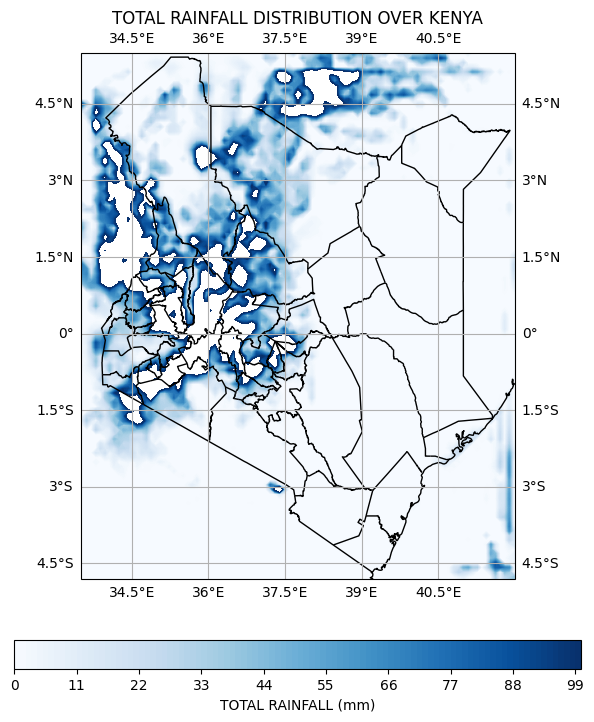

In [ ]:
# Create a figure
fig = plt.figure(figsize=(10, 8))

#Define the map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add Kenya shapefile
shapefile_path = '/content/drive/MyDrive/Kenya_Counties_KNSDI_line.shp'
kenya = gpd.read_file(shapefile_path)
kenya.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)


# Plot the total accumulated rainfall data
# Extract the 3D longitude and latitude values from the DataArrays
lon_3d = to_np(lon)[0]
lat_3d = to_np(lat)[0]

# Sum the cumulative rainfall from time step 0 to 8
rain_total_last = total_cumulative_rainfall.isel(Time=slice(0, 8)).sum(dim='Time')

# Create levels from 0 to 100 for the contour plot
levels = np.linspace(0, 100, 101)

#Create the contour
contourf = ax.contourf(lon_3d, lat_3d, to_np(rain_total_last), cmap='Blues',transform=ccrs.PlateCarree(), levels=levels, vmin=0, vmax=100)

# Add gridlines and coastlines
ax.gridlines(draw_labels=True)
ax.coastlines()
# ax.add_feature(cfeature.BORDERS, linestyle=':')

# Add horizontal color bar at the bottom
cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', fraction=0.046, pad=0.1)
cbar.set_label('TOTAL RAINFALL (mm)') # Set the label of the colorbar

# Set extent to focus on Kenya
ax.set_extent([33.5, 42.0, -4.8, 5.5], crs=ccrs.PlateCarree())

# Add title
plt.title('TOTAL RAINFALL DISTRIBUTION OVER KENYA')

# Show the plot
plt.show()

In [ ]:
# Extract U and V wind components at a specified level (eg. above 10 metres)
u = data['U10']
v = data['V10']
U = data['U']
V = data['V']
p = data['P'] #perbutation pressure
pb = data['PB'] #base state presure
#calculate the wind speed and wind direction from the U and V components of wind using square root function
Wind_speed = np.sqrt(u**2 + v**2)
Wind_direction =np.arctan2(v,u) *(180/np.pi)+180 #calculates the wind direction in degrees and adjusted to follow the convention where 0° is north.
# Convert wind speed to knots
Wind_speed_knots = Wind_speed * 1.94384

# Ensure wind direction is in the range 0° to 360°
Wind_direction_knots = Wind_direction % 360  # Already within range, but this ensures proper wrapping
# Get the latitude and longitude points
lat, lon = latlon_coords(Wind_speed)


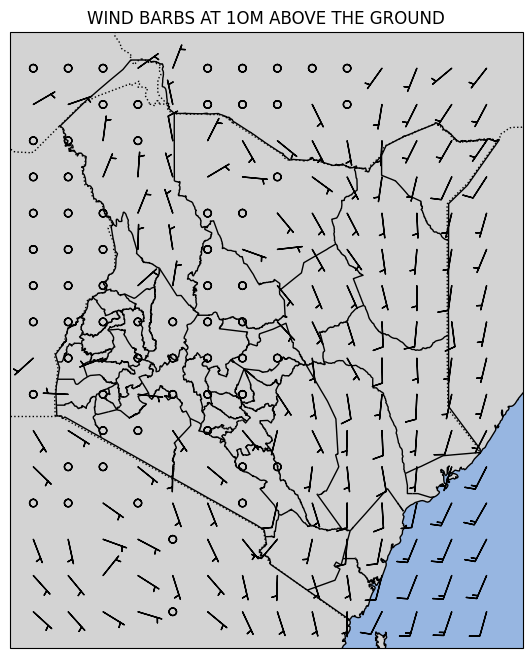

In [ ]:
# Create a figure
fig = plt.figure(figsize=(10, 8))

#Define the map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add Kenya shapefile
shapefile_path = '/content/drive/MyDrive/Kenya_Counties_KNSDI_line.shp'
kenya = gpd.read_file(shapefile_path)
kenya.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

# Add geographical features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN)

# Plot wind barbs
plt.barbs(to_np(lon), to_np(lat), to_np(u), to_np(v),
          length=6, regrid_shape=15)

# Add a title
plt.title("WIND BARBS AT 1OM ABOVE THE GROUND")
#show plot
plt.show()



]\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

In [ ]:
total_pressure = p + pb
level_300mb = np.abs(total_pressure - 300).argmin(axis=0)  # Find index along the first axis
level_700mb = np.abs(total_pressure - 700).argmin(axis=0)  # Find index along the first axis

In [ ]:
U_300mb = U[:, level_300mb]
V_300mb = V[:, level_300mb]
U_700mb = U[:, level_700mb]
V_700mb = V[:, level|||||||||||||||||||||||||||||||||||||||||||||||?_700mb]

NameError: name 'U' is not defined

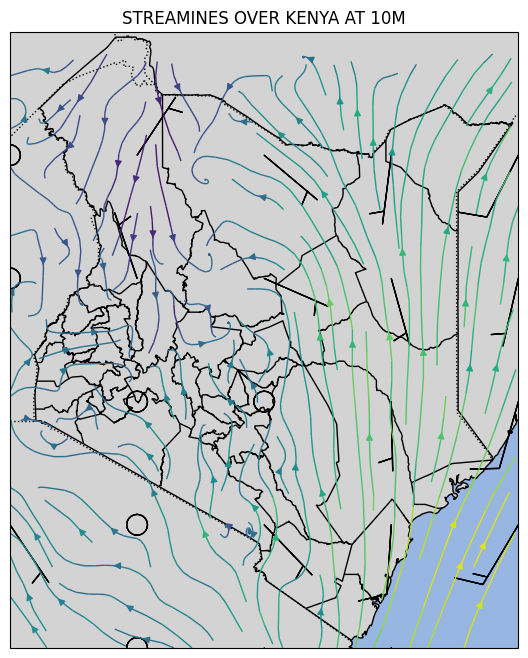

In [ ]:
 # Create a figure
fig = plt.figure(figsize=(10, 8))

#Define the map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add Kenya shapefile
shapefile_path = '/content/drive/MyDrive/Kenya_Counties_KNSDI_line.shp'
kenya = gpd.read_file(shapefile_path)
kenya.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

# Add geographical features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN)
# Plot streamlines
stream = ax.streamplot(to_np(lon), to_np(lat), to_np(u), to_np(v),
                       color=to_np(v), linewidth=1, cmap='viridis')
# Set extent to focus on Kenya
ax.set_extent([33.5, 42.0, -4.8, 5.5], crs=ccrs.PlateCarree())

# Plot wind barbs
plt.barbs(to_np(lon), to_np(lat), to_np(u), to_np(v),
          length=10, regrid_shape=5)

# Add titles and labels
plt.title('STREAMINES OVER KENYA AT 10M')

plt.show()


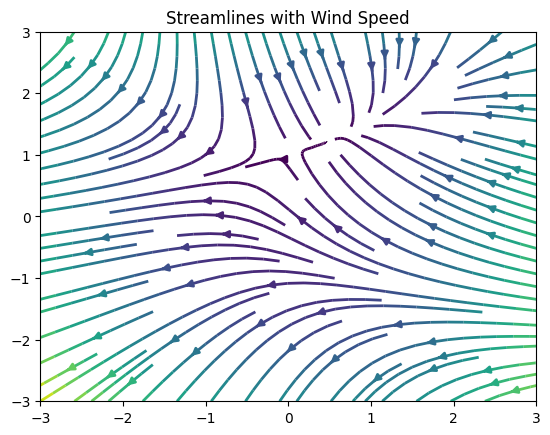

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: creating a grid and vectors (wind speed components)
Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2

# Compute the magnitude of the velocity for the color
speed = np.sqrt(U**2 + V**2)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the streamlines
stream = ax.streamplot(X, Y, U, V, color=speed, linewidth=2, cmap='viridis')

# Set title
ax.set_title('Streamlines with Wind Speed')

# Display the plot
plt.show()

In [ ]:
from google.colab import files

# Path to your file
file_path = '/content/drive/MyDrive/wrfout_d01_2024-05-20_06 00 00'

# Download the file
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>